# Brianna Zhou

## Research question/interests

Briefly describe your research question or interests here.

### Research Interests
**How do different tree species in Vancouver’s public spaces vary in terms of growth patterns and physical traits, and what does this suggest about their sustainability for Vancouver’s urban environment?**

### Research Questions

- How do height and diameter vary across different tree species in Vancouver’s public spaces?

- How does the spatial distribution of the physical traits of species differ across Vancouver?

- How do height and diameter of tree influence their placement in different urban settings (e.g., streets, parks, medians, and greenways)?


In [1]:
import altair as alt
import pandas as pd
from toolz.curried import pipe
import os
from pygbif import species

import sys
sys.path.append("../../code")
import data_clean
import preprocess_query_family
import preprocess_query_pollen
import preprocess_change_col_type
import altair_data_transformer

# Create a new data transformer that stores the files in a directory
data_dir = 'altairdata'
altair_data_transformer.setup_altair_for_large_data(data_dir)

In [2]:
tree = pd.read_csv("../../data/processed/public_trees_cleaned.csv", delimiter=",")
tree.head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,...,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,DATE_PLANTED,LATITUDE,LONGITUDE,NOMENCLATURE,ON_ADDRESS,FAMILY_NAME,HAS_POLLEN
0,229002,2128.0,E 54TH AV,FAGUS,SYLVATICA,DAWYCKII,DAWYCK'S BEECH,2100.0,E 54TH AV,VICTORIA-FRASERVIEW,...,2.0,20-30,3.0,2014-03-12,49.220201,-123.063773,FAGUS SYLVATICA,2100 E 54TH AV VICTORIA-FRASERVIEW (EVEN),FAGACEAE,True
1,229005,8443.0,FREMLIN ST,ACER,TRUNCATUM,PACIFIC SUNSET,PACIFIC SUNSET MAPLE,8400.0,FREMLIN ST,MARPOLE,...,3.0,30-40,12.0,2010-11-08,49.209678,-123.127519,ACER TRUNCATUM,8400 FREMLIN ST MARPOLE (ODD),ACERACEAE,False
2,229013,1407.0,W 59TH AV,PRUNUS,CERASIFERA,NIGRA,NIGHT PURPLE LEAF PLUM,7400.0,CARTIER ST,MARPOLE,...,1.0,10-20,3.0,2010-10-20,49.217625,-123.137902,PRUNUS CERASIFERA,7400 CARTIER ST MARPOLE (ODD),ROSACEAE,True
3,229015,489.0,W 2ND AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,400.0,W 2ND AV,MOUNT PLEASANT,...,1.0,10-20,3.0,2009-12-10,49.266990,-123.114105,PYRUS CALLERYANA,400 W 2ND AV MOUNT PLEASANT (MED),ROSACEAE,False
4,229016,489.0,W 2ND AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,400.0,W 2ND AV,MOUNT PLEASANT,...,1.0,10-20,3.0,2009-12-10,49.267046,-123.113992,PYRUS CALLERYANA,400 W 2ND AV MOUNT PLEASANT (MED),ROSACEAE,False


In [3]:
display(tree.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181501 entries, 0 to 181500
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TREE_ID             181501 non-null  int64  
 1   CIVIC_NUMBER        181450 non-null  float64
 2   STD_STREET          181450 non-null  object 
 3   GENUS_NAME          181450 non-null  object 
 4   SPECIES_NAME        181450 non-null  object 
 5   CULTIVAR_NAME       181450 non-null  object 
 6   COMMON_NAME         181450 non-null  object 
 7   ON_STREET_BLOCK     181450 non-null  float64
 8   ON_STREET           181450 non-null  object 
 9   NEIGHBOURHOOD_NAME  177522 non-null  object 
 10  STREET_SIDE_NAME    181450 non-null  object 
 11  HEIGHT_RANGE_ID     181450 non-null  float64
 12  HEIGHT_RANGE        181450 non-null  object 
 13  DIAMETER            181450 non-null  float64
 14  DATE_PLANTED        74156 non-null   object 
 15  LATITUDE            181450 non-nul

None

In [4]:
display(tree.describe())

,TREE_ID,CIVIC_NUMBER,ON_STREET_BLOCK,HEIGHT_RANGE_ID,DIAMETER,LATITUDE,LONGITUDE
count,181501.000000,181450.000000,181450.000000,181450.000000,181450.000000,181450.000000,181450.000000
mean,176086.154627,3094.836963,3068.468713,2.997641,12.735278,49.248837,-123.107690
std,103380.908520,2125.565653,2132.705720,1.939778,10.201576,0.022868,0.048922
min,12.000000,0.000000,0.000000,1.000000,0.000000,49.200203,-123.236684
25%,86445.000000,1396.000000,1400.000000,1.000000,4.000000,49.230406,-123.144384
50%,175660.000000,2733.000000,2700.000000,2.000000,10.000000,49.248466,-123.109571
75%,264569.000000,4489.000000,4500.000000,4.000000,18.000000,49.266610,-123.064567
max,344765.000000,9295.000000,9900.000000,9.000000,305.000000,49.312730,-123.023294


In [5]:
display(tree.nunique())

TREE_ID               181501
CIVIC_NUMBER            8338
STD_STREET               814
GENUS_NAME               169
SPECIES_NAME             539
CULTIVAR_NAME           1070
COMMON_NAME             1297
ON_STREET_BLOCK          189
ON_STREET                822
NEIGHBOURHOOD_NAME        22
STREET_SIDE_NAME           6
HEIGHT_RANGE_ID            9
HEIGHT_RANGE               9
DIAMETER                 490
DATE_PLANTED            4570
LATITUDE              181318
LONGITUDE             181315
NOMENCLATURE             701
ON_ADDRESS             19266
FAMILY_NAME               65
HAS_POLLEN                 2
dtype: int64

## Explanatory Data Analysis

### Distribution of Diameter and Height Range

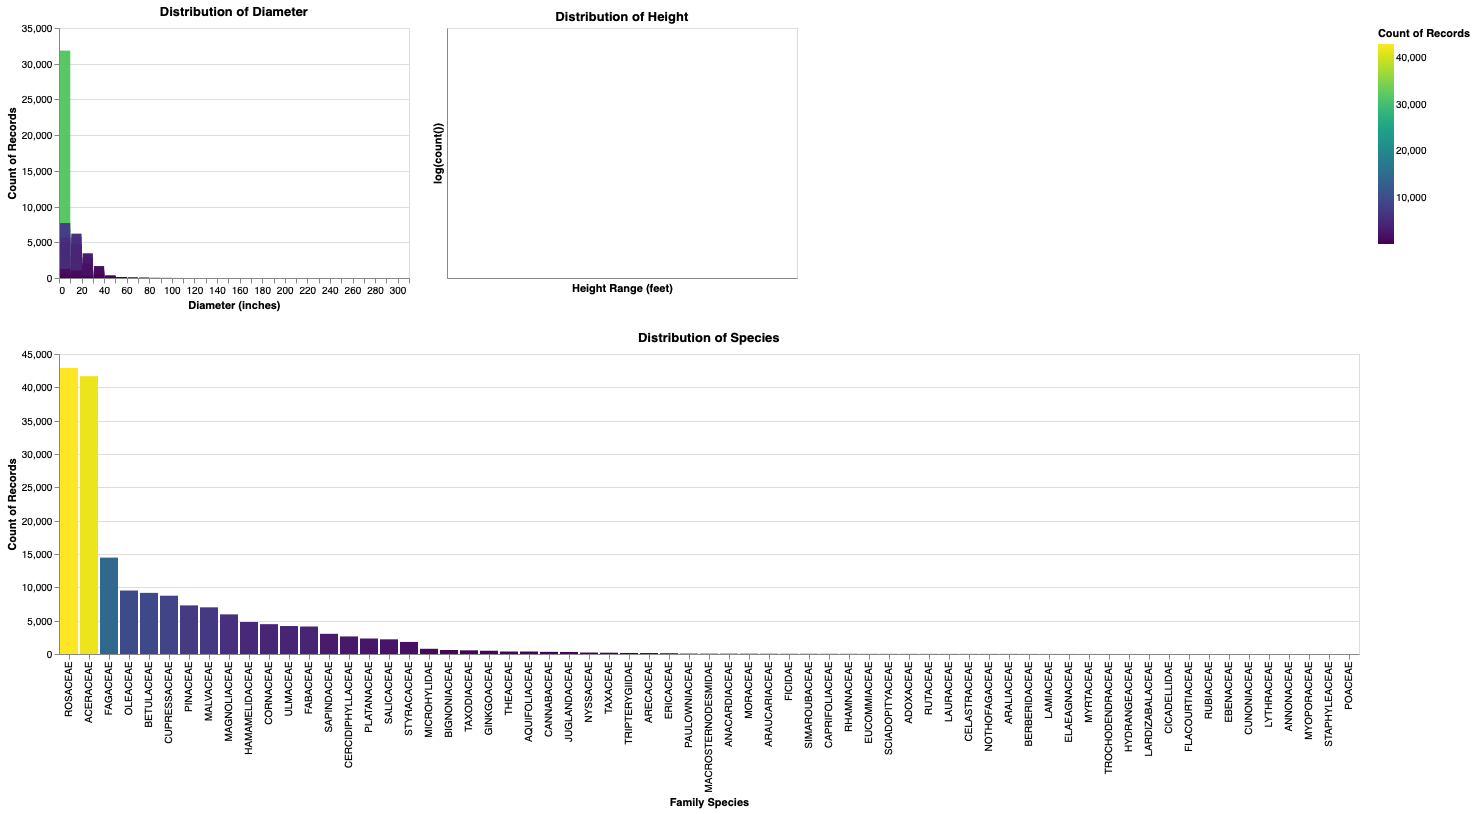

In [10]:
dia_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("DIAMETER:Q", title = "Diameter (inches)", bin=alt.Bin(maxbins=50)),
    alt.Y("count():Q"),
    alt.Color("count()", scale=alt.Scale(scheme='viridis')),
    alt.Tooltip(["DIAMETER", "count()"])
).properties(
        title = "Distribution of Diameter",
        height = 250,
        width = 350
    )

height_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("HEIGHT_RANGE", title = "Height Range (feet)"),
    alt.Y("count():Q"),
    alt.Color("count()"),
    alt.Tooltip(["HEIGHT_RANGE", "count()"])
).properties(
        title = "Distribution of Height",
        height = 250,
        width = 350
    )

tree_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("FAMILY_NAME:N", title = "Family Species", sort = "-y"),
    alt.Y("count():Q"),
    alt.Color("count()"),
    alt.Tooltip(["FAMILY_NAME:N", "count()"])
).properties(
        title = "Distribution of Species"
    )
tree_dist

(dia_dist | height_dist) & tree_dist

- The distribution of diameter illustrates that the dataset is dominated by trees with smaller diameters, suggesting a younger or smaller trees in Vancouver. In addition, larger trees (e.g., > 50 inches) are rare, possibly due to environmental constraints.
- The distribution of height range shows that the dataset is dominated by trees with smaller and median height and taller trees are rare.
- The distribution of family species shows that certain families (e.g. Sapindaceae, Fagaceae) have the highest count dominating the dataset. In addition, many families have low representation, indicating rare or less common species. 

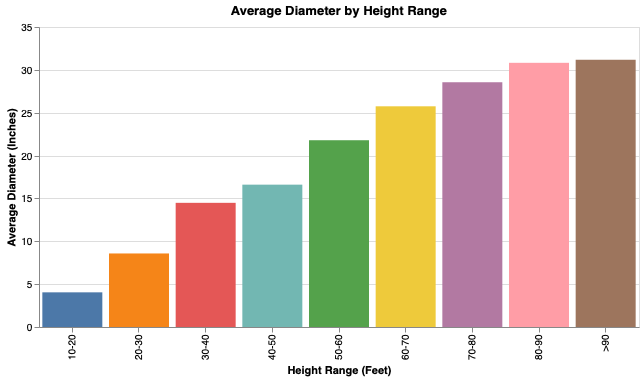

In [7]:
bar_chart = alt.Chart(tree).mark_bar().encode(
    alt.X("HEIGHT_RANGE:O", title="Height Range (Feet)", sort="ascending"),
    alt.Y("mean(DIAMETER):Q", title="Average Diameter (Inches)"),
    alt.Color("HEIGHT_RANGE:N", legend=None)
).properties(
    title="Average Diameter by Height Range",
    width=600
)

bar_chart

The bar chart illustrates the relationship between tree height ranges and their average diameter. This shows that the tree height and diameter are positively correlated as taller trees have larger diameters due to the growth patterns.

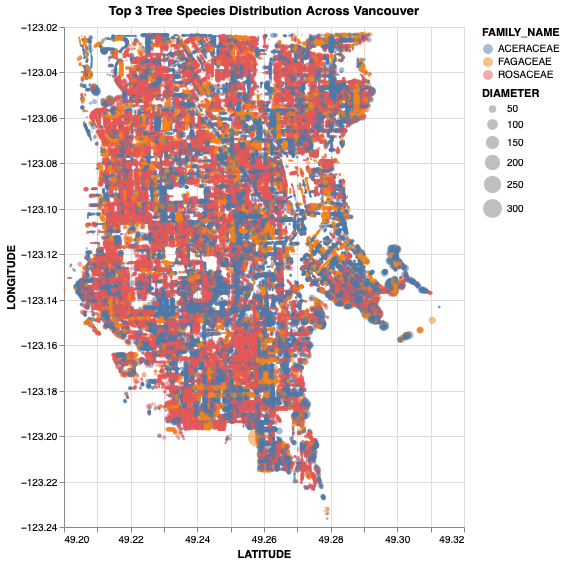

In [8]:
# Select TOP 3 species by count
top_species = tree['FAMILY_NAME'].value_counts().head(3).index.tolist()

# Filter data for top 20 family species
top_tree_species  = tree[tree['FAMILY_NAME'].isin(top_species)]

species_map = alt.Chart(top_tree_species).mark_circle(opacity=0.5, size=5).encode(
    alt.X('LATITUDE:Q', scale=alt.Scale(zero=False)),
    alt.Y('LONGITUDE:Q', scale=alt.Scale(zero=False)),
    size = "DIAMETER",
    color='FAMILY_NAME:N',
    tooltip=['FAMILY_NAME', 'DIAMETER', 'HEIGHT_RANGE']
).properties(
    title='Top 3 Tree Species Distribution Across Vancouver',
    width = 400,
    height = 500
)
species_map


This graph focuses on the geographic distribution of the three most common tree family species across Vancouver. It's clear that Rosaceae spread broadly, Sapindaceae dominate at higher latitudes and Fagaceae have limited spread. Moreover, these three family species have small diameters.

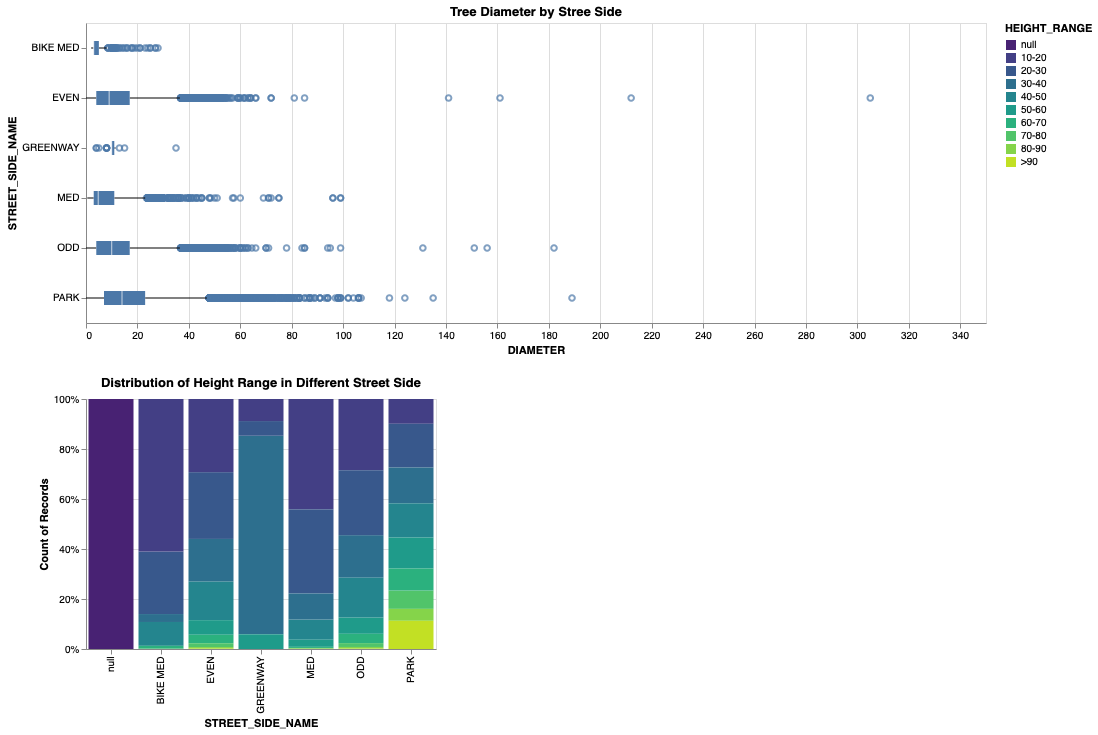

In [9]:
diameter_boxplot = alt.Chart(tree).mark_boxplot().encode(
    y='STREET_SIDE_NAME:N',
    x='DIAMETER:Q',
).properties(
    title='Tree Diameter by Stree Side',
    height=300,
    width = 900
)

height_bar = alt.Chart(tree).mark_bar().encode(
    alt.X("STREET_SIDE_NAME"),
    alt.Y("count():Q", stack='normalize'),
    alt.Color("HEIGHT_RANGE", scale=alt.Scale(scheme='viridis')),
    alt.Tooltip(["HEIGHT_RANGE", "count()"])
).properties(
        title = "Distribution of Height Range in Different Street Side",
        height = 250,
        width = 350
    )

diameter_boxplot & height_bar


-  The distribution of diameter in different street sides shows that `Park` and `Even` side of the street  have larger-diameter trees compared to the rest and the range of tree diameter in `Greenway` is the smallest.
-  The distribution of height range in different street side shows that `Even` street sides have a mix of short to medium height trees, with most record of 30-40 feet height and `Park` have many tall trees compared to the others. 

## Task Analysis 

1. Determine Range: Identify the range of tree diameters.
2. Characterize Distribution:
   - Analyze the distribution of diameters and heights among different tree species.
   - Examine the distribution of heights and diameters along different street sides.
4. Sort: Rank tree species based on their average diameters and the most common height ranges.
5. Find Extremum: Identify the tree species with the largest diameters and/or height ranges.
6. Filter: Select the top 10 tree species that have diameters greater than 50 cm to illustrate their distribution.
7. Compute Derived Value:
   - Compute the total number of trees/ average number of trees in each street side
   - Compute the total number of trees in each family species

## Preliminary Sketches

~250 words

## Next Step